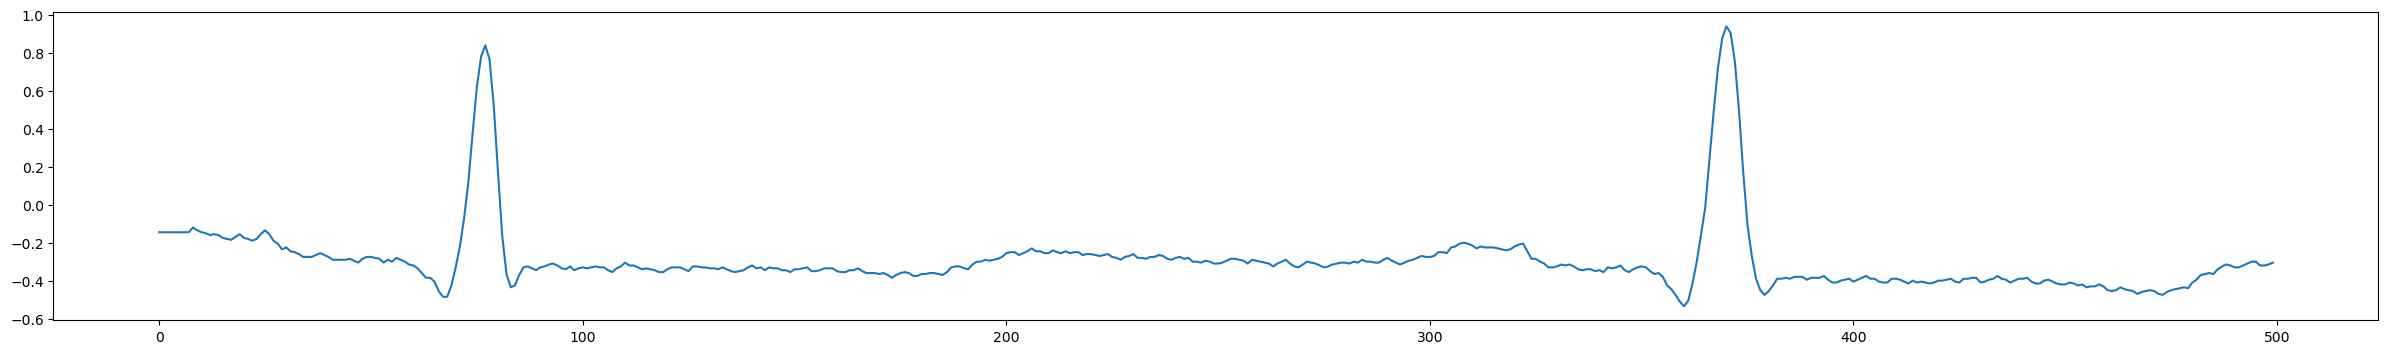

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wfdb import rdrecord, rdann, processing
from sklearn import preprocessing
import wfdb    

data_directory = '/home/alphabet/ML health project/mit-bih-arrhythmia-database-1.0.0/'

patients_list = ['100','101','102','103','104','105','106','107',
           '108','109','111','112','113','114','115','116',
           '117','118','119','121','122','123','124','200',
           '201','202','203','205','207','208','209','210',
           '212','213','214','215','217','219','220','221',
           '222','223','228','230','231','232','233','234']

# Classification based on AAMI
AAMI_labels = ['N','L','R','B','A','a','j','S','V','r','F','e','j','n','E','f','/','Q','?']

# Normal Beat Symbols
normal_beats = ['N']

AAMI_mapping = {'N': ['N','L','R','B'],
       'S': ['A','a','j','S','e','j','n'],
       'V': ['V','r','E'],
       'F': ['F'],
       'Q': ['Q','?','f','/'],}

record = wfdb.rdrecord(data_directory + '100', smooth_frames=True)
scaled_signal = preprocessing.scale(np.nan_to_num(record.p_signal[:,0]))

plt.figure(figsize=(30, 4))
plt.plot(record.p_signal[:500,0])
plt.savefig('ecg.png', format='png', dpi=400)


In [4]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
normalized_signal = min_max_scaler.fit_transform(record.p_signal[:,0].reshape(-1,1))


from wfdb import rdrecord, rdann, processing
from sklearn import preprocessing

sampling_rate = 360
window_size = 200

labels = []
beat_segments = []

for patient_id in patients_list:
    print('Processing record number:', patient_id)
    record = wfdb.rdrecord(data_directory + patient_id, smooth_frames=True)
    scaled_signal = preprocessing.scale(np.nan_to_num(record.p_signal[:, 0]))

    qrs_detector = processing.XQRS(sig=scaled_signal, fs=sampling_rate)
    qrs_detector.detect()
    peaks_indices = qrs_detector.qrs_inds

    for peak_index in peaks_indices[1:-1]:
        start_index, end_index = peak_index - window_size // 2, peak_index + window_size // 2
        annotation = wfdb.rdann(data_directory + patient_id, extension='atr', sampfrom=start_index, sampto=end_index, return_label_elements=['symbol'])
        annotation_symbol = annotation.symbol
        if len(annotation_symbol) == 1 and annotation_symbol[0] in AAMI_labels:
            for label, symbol_list in AAMI_mapping.items():
                if annotation_symbol[0] in symbol_list:
                    labels.append(label)
                    beat_segment = scaled_signal[start_index:end_index]
                    # Padding if length is less than 200
                    if len(beat_segment) < window_size:
                        beat_segment = np.pad(beat_segment, (0, window_size - len(beat_segment)), 'constant')
                    beat_segments.append(beat_segment)


Processing record number: 100
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Processing record number: 101
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Processing record number: 102
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Processing record number: 103
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Processing record number: 104
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Processing record number: 105
Learning initial signal parameters...
Fo

In [5]:
df = pd.DataFrame(beat_segments)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

df['Label'] = labels
df['Label_numeric'] = encoded_labels

In [6]:
df.to_csv('poster_presentation.csv')

In [7]:
ecg_data = pd.read_csv("poster_presentation.csv", index_col=0)

In [11]:
ecg_data

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,Label,Label_numeric
0,-0.045036,0.032603,0.006723,-0.019156,-0.070916,-0.122676,-0.096796,-0.045036,-0.019156,0.006723,...,-0.743796,-0.666156,-0.717916,-0.743796,-0.769676,-0.847316,-0.795556,-0.769676,N,1
1,-0.200316,-0.200316,-0.200316,-0.122676,-0.122676,-0.148556,-0.200316,-0.226196,-0.226196,-0.174436,...,-0.666156,-0.640276,-0.666156,-0.588516,-0.588516,-0.588516,-0.588516,-0.614396,N,1
2,-0.303836,-0.200316,-0.200316,-0.174436,-0.252076,-0.303836,-0.277956,-0.252076,-0.252076,-0.252076,...,-0.355596,-0.303836,-0.329716,-0.407356,-0.459116,-0.407356,-0.407356,-0.329716,N,1
3,-0.226196,-0.226196,-0.226196,-0.174436,-0.174436,-0.200316,-0.200316,-0.381476,-0.277956,-0.277956,...,-0.769676,-0.795556,-0.692036,-0.666156,-0.614396,-0.640276,-0.717916,-0.743796,N,1
4,-0.122676,-0.045036,-0.045036,-0.122676,-0.122676,-0.148556,-0.148556,-0.122676,-0.122676,-0.122676,...,-0.692036,-0.666156,-0.640276,-0.640276,-0.743796,-0.717916,-0.717916,-0.666156,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107395,-0.382842,-0.382842,-0.353210,-0.397657,-0.412473,-0.397657,-0.368026,-0.308763,-0.249499,-0.264315,...,-0.264315,-0.279131,-0.308763,-0.353210,-0.323578,-0.293947,-0.264315,-0.175420,N,1
107396,-0.205052,-0.249499,-0.264315,-0.264315,-0.219868,-0.175420,-0.160605,-0.130973,-0.130973,-0.116157,...,-0.160605,-0.160605,-0.160605,-0.190236,-0.130973,-0.086526,-0.027262,0.017185,N,1
107397,-0.234684,-0.249499,-0.279131,-0.234684,-0.160605,-0.116157,-0.116157,-0.145789,-0.190236,-0.175420,...,-0.308763,-0.338394,-0.323578,-0.279131,-0.264315,-0.264315,-0.279131,-0.293947,N,1
107398,-0.308763,-0.264315,-0.293947,-0.293947,-0.264315,-0.264315,-0.249499,-0.234684,-0.279131,-0.323578,...,-0.293947,-0.293947,-0.264315,-0.249499,-0.190236,-0.175420,-0.145789,-0.101341,N,1


In [9]:
x_columns = [str(i) for i in range(0, 200)]

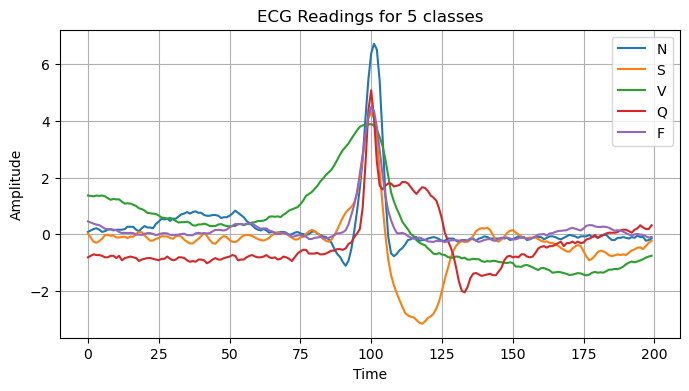

In [10]:
all_readings = []


row_number = 80 # Change this number to the desired row

for symbol in ecg_data["Label"].unique():
    
    readings = ecg_data[ecg_data["Label"] == symbol].iloc[row_number][x_columns].values
    
    all_readings.append(readings)

all_readings = np.array(all_readings)

plt.figure(figsize=(8, 4))
for i, symbol in enumerate(ecg_data["Label"].unique()):
    plt.plot(all_readings[i], label=symbol)

plt.title("ECG Readings for 5 classes")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.grid()
plt.legend()
plt.show()